# Closed root-finding methods

The roots of nonlinear functions are more complicated than linear functions. We can seldom solve for the roots directly (notable exception being polynomial functions), and instead will need to *search* for them iteratively.

Iterative search methods are characterized by their *order of convergence*, which measure how successive guesses approach the true root. Given the true root $x$, we can check how successive guesses approach it by calculating the error:

$$ x^{i+1}-x \propto [x^{i}-x]^k $$

where $k$ is the order.

## Bracketting methods

Bracketing methods exploits the fact that functions change sign across the roots of a 1-D function (a simple applicaiton of the intermediate value theorem). This does not work for certain cases (eg: $1/x$).



### Bisection methods

Bisection methods are essentially a binary search for the root. If $f(x)$ is continuous between bounds $a$ and $b>a$ and $f(a)$ and $f(b)$ are opposite signs, there must be a point $c$ where $f(c)=0$.

The algorithm is:
> Given brackets $a$ and $b$
>
> Calculate the midpoint $c = (b-a)/2$.
>
> If $f(c) \approx 0$ or $a \approx b$: exit.
>
> If $f(c)>0$: set $a = c$
>
> If $f(c)<0$: set $b = c$
>
> repeat



Graphically this is:


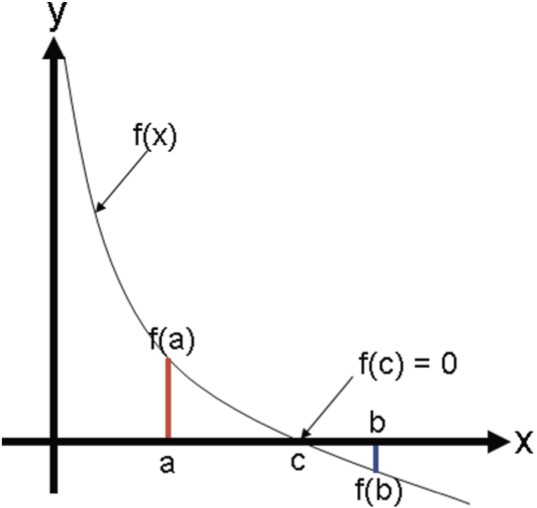

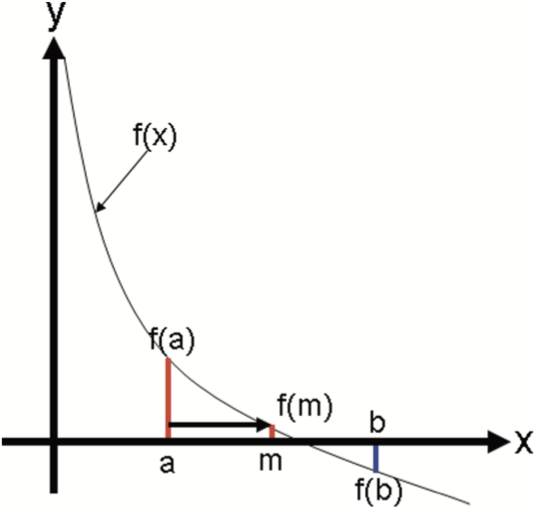

In [ ]:
# prompt: Find the root of x^2-2 using bisect

from scipy.optimize import bisect

def f(x):
  return x**2 - 2

print('Setting x tolerance: \n')
xtols = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
for xtol in xtols:
  print(bisect(f, 1, 2, maxiter = 100, xtol = xtol))


print('\nSetting relative tolerance \n', bisect(f, 1, 2, maxiter = 100, rtol = 1e-12))

Setting x tolerance: 

1.4375
1.4140625
1.4150390625
1.41424560546875
1.4142074584960938

Setting relative tolerance 
 1.4142135623715149


The error of the Bisection Method generaly follows:

$$ x^{i+1}-x = \frac{1}{2} [x^{i}-x] $$

and therefore has a linear order of convergence ($k=1$).

### Method of False Position (Regula falsi)

Let's use more information! In bisection we are only interested in $f(a,b)$ switching signs, but it stands to reason the larger $f(b)$ is compared to $f(a)$, the further the root is from $b$!

The method of false position uses this information to determine the next candidate solution:

$$ c= b - f(b) \frac{b-a}{f(b)-f(a)} $$

The same algorithm as for bisection is then applied to replace either $a$ or $b$ with $c$ so that the root remains bracketted.

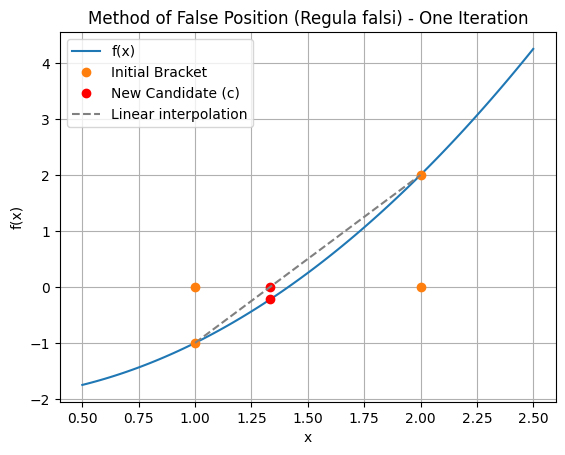

In [ ]:
# prompt: Give me a plot that illustrates the method of false position using one iteration, showing a line between the original brackets

import numpy as np
import matplotlib.pyplot as plt


def f(x):
  return x**2 - 2

# Example values for a and b
a = 1
b = 2

# Calculate f(a) and f(b)
fa = f(a)
fb = f(b)

# Calculate the next candidate solution c using the method of false position
c = b - fb * (b - a) / (fb - fa)
fc = f(c)

# Generate x values for the plot
x = np.linspace(a - 0.5, b + 0.5, 100)

# Plot the function
plt.plot(x, f(x), label='f(x)')

# Plot the initial bracket
plt.plot([a, b, a, b], [fa, fb, 0, 0], 'o', label='Initial Bracket')

# Plot the new candidate solution c
plt.plot([c, c], [fc, 0], 'ro', label='New Candidate (c)')


# Plot the line connecting (a, f(a)) and (b, f(b))
plt.plot([a, b], [fa, fb], '--', color='gray', label='Linear interpolation')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Method of False Position (Regula falsi) - One Iteration')
plt.legend()
plt.grid(True)
plt.show()


Note that the line joining the brackets approximates the tangent of the curve.

The method of False Position has an order of convergence of 1.618 (the Golden Ratio!):

$$ x^{i+1}-x \propto [x^i-x]^{1.618} $$

This is considered *superlinear* and a good thing!

## Summary of bracketting methods

Bracketting methods are usually robust but slow to converge and generlization to N-D is not trivial.

Through incorporating the additional information of linear interpolation, the method of Flase Position achieves superlinear convergence.

But bracketting is complicated in N-D, so let's try to remove it.